<a href="https://colab.research.google.com/github/EdioHub/churn/blob/main/Churn_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELO DE CHURN

# 1. Introdução
Empresas que têm a cultura data driven maximizam seus resultados através de informações extraídas dos dados. Ou seja, utilizam os dados para extrair informações e usam as informações para tomar decisões.


A taxa de retenção de clientes é um bom indicativo de qualidade do seu produto/serviço. Se o produto/serviço não é de qualidade, você irá observar uma porcentagem alta de clientes deixando de comprar ou trocando de empresa, ou seja, uma alta taxa de Churn.

Mas quais são as características que levam um cliente a dar o Churn?

Na parte I, entendemos o problema de Churn e estabelecemos o objetivo, identificar o perfil e prever os clientes em risco de Churn.

Na  parte II daremos continuidade a análise e para isso utilizaremos um conjunto de dados de uma agência bancária.

Nesse  projeto de Data Science seguiremos as seguintes etapas

Entendimento do Problema, Obtenção dos dados, Análise Exploratória e Visualização dos dados, Pré-processamento ,Modelos de Machine Learning e Avaliação do modelo

# 2-Coleta de dados

In [47]:
import pandas as pd

In [48]:
#para uso de meu drive no git arqivo separado
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
df = pd.read_csv('./drive/MyDrive/Colab_Notebooks/Colab_machine_learning/Churn_Modelling.csv')

In [50]:
df.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Em credit score  quanto mais alta a taxa maior a possibiolidade de inadimplência,tenure seria o tempo como cliente e balance seria o saldo.

In [51]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Entendimento do Banco de Dados na descrição

Temos um montante de 10.000 clientes com 
credito de score médio de 650 e  mínimo de 350
a idade média é 38 anos, o tempo como cliente 5 anos, a média de saldo 76.485, a quantidade média de produtos é 1,85, 70 % dos clientes possuem cartão de crédito, a média de salário é de 100.090 e media de evasão da conta é de 20,3 %.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd41623b550>,
      dtype=object)

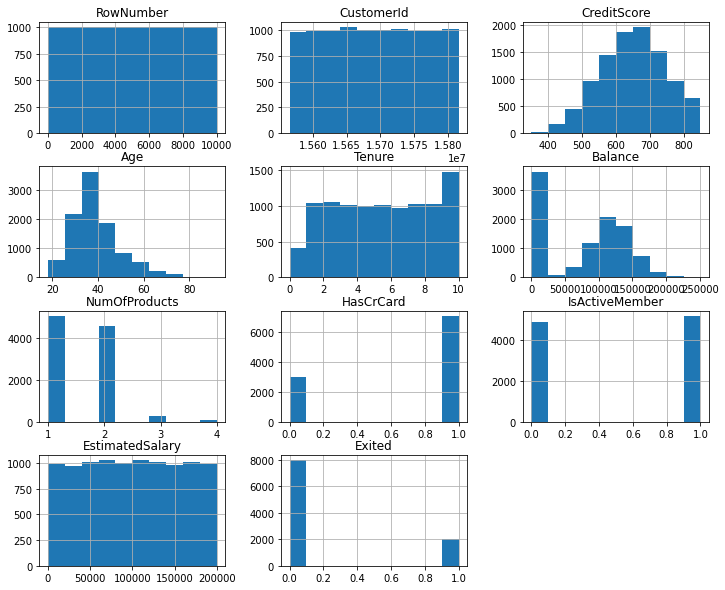

In [52]:
df.hist(figsize=(12,10))

Muitos clientes abaixo de 40 anos, poucas pessoas possuem mais de 2 produtos.muitos clientes  sem atividade.

In [53]:
import numpy as pd
import seaborn as sns

In [54]:
#from pandas.cUntitled8ore.internals.blocks import maybe_coerce_values
myred='#EF2F1C'
myblue='#5EA2C9'
mygreen='#36F51B'
cols=[myred,myblue,mygreen]

In [55]:
df['Exited'].sum()/df['Exited'].count()

0.2037

Porcentagem de Clientes que fecharam a conta 20,37 % .

# Variáveis Categóricas para comparação com contas fechadas
Primeiro vamos analisar as variáveis categóricas em relação a variável de saída (Exited). Utilizaremos gráficos de barras para esse fim.

#Variável Sexo

In [56]:
from sys import getfilesystemencodeerrors
df['Gender']=df['Gender'].replace(['Female','Male'],['Feminino','Masculino'])



In [57]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Feminino,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Feminino,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Feminino,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Feminino,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Feminino,43,2,125510.82,1,1,1,79084.10,0


In [58]:
#porcentagem de genero
df_plot = df.groupby('Gender').Exited.mean().reset_index()

In [59]:
df_plot

,Gender,Exited
0,Feminino,0.250715
1,Masculino,0.164559


,Geography,Exited
0,Alemanha,0.324432
1,Espanha,0.166734
2,França,0.161548


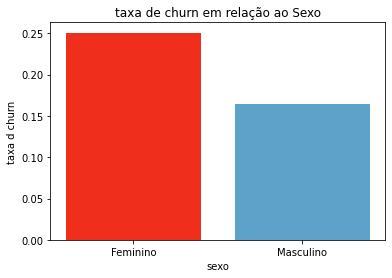

In [60]:

from matplotlib import pyplot as plt
x =   df_plot['Gender']
y = df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('taxa de churn em relação ao Sexo');
plt.xlabel('sexo');
plt.ylabel('taxa d churn');df['Geography'] = df['Geography'].replace(['France','Germany','Spain'],['França','Alemanha','Espanha'])
df_plot = df.groupby ('Geography'). Exited.mean (). reset_index () 
df_plot 

As mulheres tem uma taxa de evasão consideravelmente maior que os homens.

# Variável País

In [61]:
df['Geography'] = df['Geography'].replace(['France','Germany','Spain'],['França','Alemanha','Espanha'])
df_plot = df.groupby ('Geography'). Exited.mean (). reset_index () 
df_plot 

,Geography,Exited
0,Alemanha,0.324432
1,Espanha,0.166734
2,França,0.161548


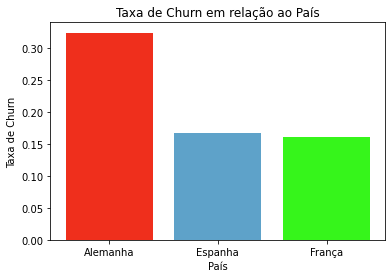

In [62]:
#País em relação a variável churn
x = df_plot['Geography']
y = df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao País');
plt.xlabel('País');
plt.ylabel('Taxa de Churn');

A Alemanha tem uma maior taxa de churn, o dobro dos outros países

# Variável cartão de crédito



In [63]:
df['HasCrCard']=df['HasCrCard'].replace([0,1],['Não','Sim'])

In [64]:
df_plot = df.groupby ('HasCrCard'). Exited.mean (). reset_index () 
df_plot

,HasCrCard,Exited
0,Não,0.208149
1,Sim,0.201843


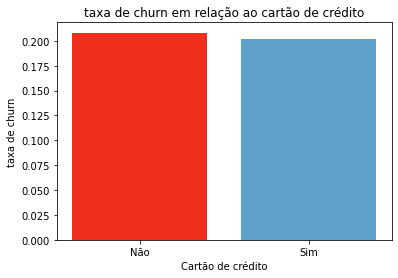

In [65]:
x = df_plot['HasCrCard']
y = df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('taxa de churn em relação ao cartão de crédito');
plt.xlabel('Cartão de crédito');
plt.ylabel('taxa de churn');

Não parece ser relevante a permanência de clientes em função de possuírem cartão de crédito

# Variável membro ativo

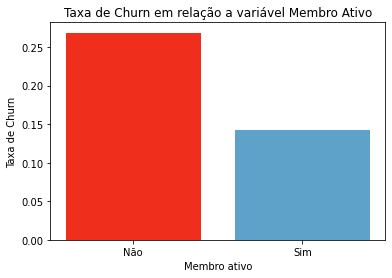

In [66]:
df['IsActiveMember'] = df['IsActiveMember'].replace([0,1],['Não','Sim'])
df_plot = df.groupby ('IsActiveMember'). Exited.mean (). reset_index () 
#Membro ativo em relação a variável churn
x = df_plot['IsActiveMember']
y = df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a variável Membro Ativo');
plt.xlabel('Membro ativo');
plt.ylabel('Taxa de Churn');

Os membros inativos possuem maior tendência de evasão, talvez já estejam migrando enquanto estão inativos, boa oportunidade de estabelecer contato para nova inserção com aplicação de marketing de novos produtos e benefícios por exemplo. 

# Variável Saldo Bancário

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

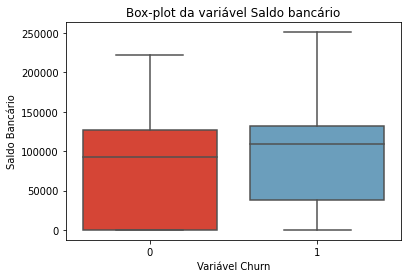

In [67]:
#box-plot saldo bancario em relação ao Churn
cols = [myred, myblue,mygreen]
sns.boxplot(x = "Exited", y="Balance", data=df,palette=cols);
plt.title('Box-plot da variável Saldo bancário');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
df.groupby(['Exited'])['Balance'].mean()

A média de clientes com saldo bancário mais alto tem maior tendência a encerrar a conta, talvez seja pelo fato de muitos não encerrem pois  apenas deixam a conta sem saldo.

# Variável Idade

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

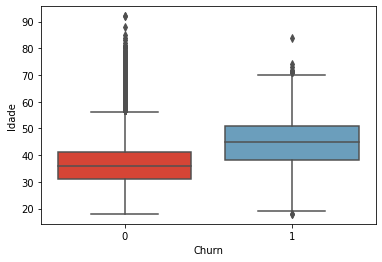

In [68]:
#box-plot Idade pelo Churn
df['IsActiveMember'] = df['IsActiveMember'].replace([0,1],['Não','Sim'])
sns.boxplot(x="Exited", y="Age" , data=df,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Idade');
df.groupby(['Exited'])['Age'].mean()



Pessoas com  média deidade mais alta tem maior tendência a sair da conta, mas temos uma grande quantidade de clientes com idade superior a 60 anos , fora da média que não saem da conta, podem ser clienntes que não estão mais ativos e apenas abandonam a conta, mas permanecem com as mesmas.

Analisando o histórico de clientes, observamos algumas características entre os clientes que cancelaram o serviço.

Observa-se que clientes da Alemanha, do sexo feminino, que não são membros ativos, com alto número de produtos, score de crédito baixo, com saldo bancário elevado e com idade entre 50 e 60 anos têm uma taxa de Churn maior que os outros clientes.

Assim, clientes com essas características possuem um risco maior de cancelarem o serviço bancário.

# 4. PRÉ PROCESSAMENTO
Alguns algoritmos de machine learning não aceitam variáveis categóricas e por isso precisamos utilizar técnicas para converter as classes em números.

Ou seja, convertemos as colunas categóricas em numéricas simplesmente atribuindo números inteiros a classes distintas.

Para as variáveis categóricas com apenas duas classes utilizaremos a função Label Encoder para converte colunas categóricas em numéricas simplesmente atribuindo números inteiros a valores distintos.

Por exemplo, a coluna sexo tem dois valores: Feminino e Masculino . Após aplicar a função, os valores serão transformados em 1 e 0.

Vamos retirar algumas colunas que não são relevantes ao problema

In [81]:
df1 = df.drop(columns = ['RowNumber','CustomerId','Surname'])
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,França,Feminino,42,2,0.00,1,Sim,Sim,101348.88,1
1,608,Espanha,Feminino,41,1,83807.86,1,Não,Sim,112542.58,0
2,502,França,Feminino,42,8,159660.80,3,Sim,Não,113931.57,1
3,699,França,Feminino,39,1,0.00,2,Não,Não,93826.63,0
4,850,Espanha,Feminino,43,2,125510.82,1,Sim,Sim,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Masculino,39,5,0.00,2,Sim,Não,96270.64,0
9996,516,França,Masculino,35,10,57369.61,1,Sim,Sim,101699.77,0
9997,709,França,Feminino,36,7,0.00,1,Não,Sim,42085.58,1
9998,772,Alemanha,Masculino,42,3,75075.31,2,Sim,Não,92888.52,1


# Dados faltantes
verificar se existem dados nas colunas que não estão preenchidos

In [84]:
#Contato número de observações faltantes no dataset para cada variável
df2 = df.isnull().sum()
df2

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Modelo

O Y do modelo refere se ao conjunto de dados e o x ao que queremos prever.

In [93]:
y = df1['Exited']
X = df1
X = df1.drop('Exited', axis = 1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,França,Feminino,42,2,0.00,1,Sim,Sim,101348.88
1,608,Espanha,Feminino,41,1,83807.86,1,Não,Sim,112542.58
2,502,França,Feminino,42,8,159660.80,3,Sim,Não,113931.57
3,699,França,Feminino,39,1,0.00,2,Não,Não,93826.63
4,850,Espanha,Feminino,43,2,125510.82,1,Sim,Sim,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Masculino,39,5,0.00,2,Sim,Não,96270.64
9996,516,França,Masculino,35,10,57369.61,1,Sim,Sim,101699.77
9997,709,França,Feminino,36,7,0.00,1,Não,Sim,42085.58
9998,772,Alemanha,Masculino,42,3,75075.31,2,Sim,Não,92888.52


In [94]:
#Variáveis Continuas
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure']
x_cont

['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']

In [99]:
#Variáveis Categóricas dummies bobos
x_cat = list(set(X)-set(x_cont))
x_cat
x_dummies = X[x_cat]
x_dummies

,Geography,Gender,IsActiveMember,NumOfProducts,HasCrCard
0,França,0,Sim,1,Sim
1,Espanha,0,Sim,1,Não
2,França,0,Não,3,Sim
3,França,0,Não,2,Não
4,Espanha,0,Sim,1,Sim
...,...,...,...,...,...
9995,França,1,Não,2,Sim
9996,França,1,Sim,1,Sim
9997,França,0,Sim,1,Não
9998,Alemanha,1,Não,2,Sim


In [101]:
##Substituindo a variável sexo para 0 e 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender']) 
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,França,0,42,2,0.00,1,Sim,Sim,101348.88
1,608,Espanha,0,41,1,83807.86,1,Não,Sim,112542.58
2,502,França,0,42,8,159660.80,3,Sim,Não,113931.57
3,699,França,0,39,1,0.00,2,Não,Não,93826.63
4,850,Espanha,0,43,2,125510.82,1,Sim,Sim,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,França,1,39,5,0.00,2,Sim,Não,96270.64
9996,516,França,1,35,10,57369.61,1,Sim,Sim,101699.77
9997,709,França,0,36,7,0.00,1,Não,Sim,42085.58
9998,772,Alemanha,1,42,3,75075.31,2,Sim,Não,92888.52


In [108]:
X['IsActiveMember'] = le.fit_transform(X['IsActiveMember']) 
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,França,0,42,2,0.00,1,Sim,1,101348.88
1,608,Espanha,0,41,1,83807.86,1,Não,1,112542.58
2,502,França,0,42,8,159660.80,3,Sim,0,113931.57
3,699,França,0,39,1,0.00,2,Não,0,93826.63
4,850,Espanha,0,43,2,125510.82,1,Sim,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,França,1,39,5,0.00,2,Sim,0,96270.64
9996,516,França,1,35,10,57369.61,1,Sim,1,101699.77
9997,709,França,0,36,7,0.00,1,Não,1,42085.58
9998,772,Alemanha,1,42,3,75075.31,2,Sim,0,92888.52


get_dummies transforma cada categoria  em uma nova variável uerecebe 0 ou 1 se for true ou false - tipo hot_sequencecategoria

In [109]:
import pandas as pd
x_final = pd.get_dummies (data = X, columns=['Geography','NumOfProducts','HasCrCard'] )
x_final

,CreditScore,Gender,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Geography_Alemanha,Geography_Espanha,Geography_França,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_Não,HasCrCard_Sim
0,619,0,42,2,0.00,1,101348.88,0,0,1,1,0,0,0,0,1
1,608,0,41,1,83807.86,1,112542.58,0,1,0,1,0,0,0,1,0
2,502,0,42,8,159660.80,0,113931.57,0,0,1,0,0,1,0,0,1
3,699,0,39,1,0.00,0,93826.63,0,0,1,0,1,0,0,1,0
4,850,0,43,2,125510.82,1,79084.10,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,0,96270.64,0,0,1,0,1,0,0,0,1
9996,516,1,35,10,57369.61,1,101699.77,0,0,1,1,0,0,0,0,1
9997,709,0,36,7,0.00,1,42085.58,0,0,1,1,0,0,0,1,0
9998,772,1,42,3,75075.31,0,92888.52,1,0,0,0,1,0,0,0,1


In [110]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 
#usando 25% para teste e 75 para treino
x_treino, x_teste, y_treino,y_teste  = train_test_split(x_final, y, test_size = 0.25,random_state = 1)
x_treino

,CreditScore,Gender,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Geography_Alemanha,Geography_Espanha,Geography_França,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_Não,HasCrCard_Sim
651,720,1,52,7,0.00,1,14781.12,0,0,1,1,0,0,0,0,1
6560,577,0,32,1,0.00,0,9902.39,0,0,1,0,1,0,0,0,1
8974,706,0,43,1,0.00,0,31962.77,0,1,0,0,1,0,0,0,1
2348,824,1,45,3,129209.48,0,60151.77,0,0,1,1,0,0,0,1,0
5670,497,1,32,8,0.00,0,67364.42,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,621,1,47,7,107363.29,1,66799.28,1,0,0,1,0,0,0,0,1
7813,684,0,63,3,81245.79,0,69643.31,1,0,0,1,0,0,0,0,1
905,672,0,45,9,0.00,1,92027.69,0,0,1,1,0,0,0,0,1
5192,663,0,39,8,0.00,1,101168.90,0,0,1,0,1,0,0,0,1


In [112]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier() #está default
modelo.fit(x_treino,y_treino)

DecisionTreeClassifier()

# Ajuste

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Os hiperparâmetros "fixos", você chama no momento que instancia o objeto do modelo
dt = DecisionTreeClassifier(random_state=61658)

# Os que você deseja testar, coloque em um dicionário:
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,3,4,5,6,7,8,9],
}

grid = GridSearchCV(
    dt,
    params,
    cv=10,
    scoring='roc_auc', #Como regra geral, prefira métricas que não dependam de limiar na validação cruzada
    verbose=10,
    n_jobs=1,
)

grid.fit(x_treino,y_treino)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 1/10; 1/16] END criterion=gini, max_depth=2;, score=0.710 total time=   0.0s
[CV 2/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 2/10; 1/16] END criterion=gini, max_depth=2;, score=0.728 total time=   0.0s
[CV 3/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 3/10; 1/16] END criterion=gini, max_depth=2;, score=0.726 total time=   0.0s
[CV 4/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 4/10; 1/16] END criterion=gini, max_depth=2;, score=0.729 total time=   0.0s
[CV 5/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 5/10; 1/16] END criterion=gini, max_depth=2;, score=0.723 total time=   0.0s
[CV 6/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 6/10; 1/16] END criterion=gini, max_depth=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='roc_auc', verbose=10)

usei vários parametros com várias profumndidades para a melhor escolha

In [114]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [115]:
grid.best_score_

0.8310444031434473

In [119]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_teste, grid.predict_proba(x_teste)[:,1])
#numa comparação sobre a curva roc,entre  testes e predições deu uma acuracia de 85%

0.8542399961149961

In [117]:
df['proba'] = grid.predict_proba(x_final[x_treino.columns])[:,1]
df_pred = df[['CustomerId','proba']]

Temos agora uma lista de id de clientes, em ordem decrescente de probabilidade de sair da empresa.podemos fazer um corte para maiores probabilidades de churn, e relacina-los a  rentabilidade do cliente, por exemplo, para estabelecer uma estratégia de abordagem de marketing.

In [118]:
df_pred.sort_values('proba', ascending=False)

,CustomerId,proba
2962,15605000,1.0
1193,15779947,1.0
4842,15624820,1.0
2977,15655123,1.0
1117,15592583,1.0
...,...,...
4684,15736963,0.0
2173,15649738,0.0
526,15600258,0.0
6732,15718588,0.0
